### Insertions: Random Selection of Structural Variants

** Note: Data used to select 10 random deletions - HG002 ONLY**

** Background**
- 5000 Insertions and 5000 Deletions were randomly selected from our union callset of sequence resolved variants.

- **4995** unique insertions are described below.

- Features were generated by svviz to describe each variant

- tSNE was used to visualize the structure of the data

- The goal is to randomly select datapoints from each unique group/tSNE cluster and distribute these selected variants for manual curation. 

- In order to randomly select samples from each unique tSNE cluster, DBSCAN will be used to generate cluster labels. For each set of DBSCAN cluster labels, a select number will be randomly selected from each cluster group.

**Technical Overview**

Part 1
- Data preprocessing
- Run machine learning models: SVD, tSNE, DBSCAN

Part 2
- Run secondary DBSCAN analyses to generate cluster groups

***
** Part 1 **
***

In [1]:
'''
Import statements
'''
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
import sqlite3
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import DBSCAN
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [7]:
'''
Load Data
'''

df = pd.read_csv("/Volumes/rjh/homework/Final/Step4/MachineLearning/Step1.DataCleaning.Output/INS/svviz.Annotate.INS.HG002.csv")
df4 = pd.read_csv("/Volumes/rjh/homework/Final/Step4/MachineLearning/Step1.DataCleaning.Output/INS/svviz.Annotate.INS.HG002.csv")
log_size = pd.read_csv("/Volumes/rjh/homework/Final/Step4/MachineLearning/ins_Size.csv")

***
** Section A: Data Preprocessing **
- Convert all categorical data to numerical data
- Impute missing values (KNN)
- Standardize features (Scikit Learn Standard Scaler)
***

In [12]:
'''
Convert Categorical to Numerical
'''

#Label Encoding: convert categorical to numerical
label_encoder = preprocessing.LabelEncoder()
# df['chrom'] = label_encoder.fit_transform(df['chrom'])
# df['SVtype'] = label_encoder.fit_transform(df['SVtype'])
df['sample'] = label_encoder.fit_transform(df['sample'])
df['type'] = label_encoder.fit_transform(df['type'])

df.drop(['SVtype'], axis=1, inplace = True)

# Count Number of NaN in each column
dfNaN = pd.DataFrame()
df.isnull().sum()

GTconflict                                              0
GTcons                                                  0
GTsupp                                                  0
Ill250.GT                                              12
Ill250.alt_alnScore_mean                               12
Ill250.alt_alnScore_std                                12
Ill250.alt_count                                       12
Ill250.alt_insertSize_mean                             12
Ill250.alt_insertSize_std                              12
Ill250.alt_reason_alignmentScore                       12
Ill250.alt_reason_insertSizeScore                    1985
Ill250.alt_reason_orientation                          12
Ill250.amb_alnScore_mean                               12
Ill250.amb_alnScore_std                                12
Ill250.amb_count                                       12
Ill250.amb_insertSize_mean                             12
Ill250.amb_insertSize_std                              12
Ill250.amb_rea

In [16]:
df.to_csv('df_ins.csv', index=False)

In [13]:
'''
Missing values
'''
# Count Number of NaN in each column
dfNaN = pd.DataFrame()
df.isnull().sum()

GTconflict                                              0
GTcons                                                  0
GTsupp                                                  0
Ill250.GT                                              12
Ill250.alt_alnScore_mean                               12
Ill250.alt_alnScore_std                                12
Ill250.alt_count                                       12
Ill250.alt_insertSize_mean                             12
Ill250.alt_insertSize_std                              12
Ill250.alt_reason_alignmentScore                       12
Ill250.alt_reason_insertSizeScore                    1985
Ill250.alt_reason_orientation                          12
Ill250.amb_alnScore_mean                               12
Ill250.amb_alnScore_std                                12
Ill250.amb_count                                       12
Ill250.amb_insertSize_mean                             12
Ill250.amb_insertSize_std                              12
Ill250.amb_rea

In [17]:
'''
Use KNN to impute missing values
'''

#Convert dataframe to matrix
X = df.as_matrix()

# Imput missing values from three closest observations
X_imputed = KNN(k=3).complete(X)
df2 = pd.DataFrame(X_imputed)

# Re-label all columns in the dataframe
# Drop labels
# df2.columns = ['chrom', 'start', 'end', 'sample', 'id', 'type', 'SVtype', 'Size', 'Ill300x.alt_alnScore_mean', 'Ill300x.alt_alnScore_std', 'Ill300x.alt_count', 'Ill300x.alt_insertSize_mean', 'Ill300x.alt_insertSize_std', 'Ill300x.alt_reason_alignmentScore', 'Ill300x.alt_reason_insertSizeScore', 'Ill300x.alt_reason_orientation', 'Ill300x.amb_alnScore_mean', 'Ill300x.amb_alnScore_std', 'Ill300x.amb_count', 'Ill300x.amb_insertSize_mean', 'Ill300x.amb_insertSize_std', 'Ill300x.amb_reason_alignmentScore_alignmentScore', 'Ill300x.amb_reason_alignmentScore_orientation', 'Ill300x.amb_reason_flanking', 'Ill300x.amb_reason_insertSizeScore_alignmentScore', 'Ill300x.amb_reason_insertSizeScore_insertSizeScore', 'Ill300x.amb_reason_insertSizeScore_orientation', 'Ill300x.amb_reason_multimapping', 'Ill300x.amb_reason_orientation_alignmentScore', 'Ill300x.amb_reason_orientation_orientation', 'Ill300x.amb_reason_same_scores', 'Ill300x.ref_alnScore_mean', 'Ill300x.ref_alnScore_std', 'Ill300x.ref_count', 'Ill300x.ref_insertSize_mean', 'Ill300x.ref_insertSize_std', 'Ill300x.ref_reason_alignmentScore', 'Ill300x.ref_reason_insertSizeScore', 'Ill300x.ref_reason_orientation', 'Ill300x.GT', 'Ill250.alt_alnScore_mean', 'Ill250.alt_alnScore_std', 'Ill250.alt_count', 'Ill250.alt_insertSize_mean', 'Ill250.alt_insertSize_std', 'Ill250.alt_reason_alignmentScore', 'Ill250.alt_reason_insertSizeScore', 'Ill250.alt_reason_orientation', 'Ill250.amb_alnScore_mean', 'Ill250.amb_alnScore_std', 'Ill250.amb_count', 'Ill250.amb_insertSize_mean', 'Ill250.amb_insertSize_std', 'Ill250.amb_reason_alignmentScore_alignmentScore', 'Ill250.amb_reason_alignmentScore_orientation', 'Ill250.amb_reason_flanking', 'Ill250.amb_reason_insertSizeScore_alignmentScore', 'Ill250.amb_reason_multimapping', 'Ill250.amb_reason_orientation_alignmentScore', 'Ill250.amb_reason_orientation_orientation', 'Ill250.amb_reason_same_scores', 'Ill250.ref_alnScore_mean', 'Ill250.ref_alnScore_std', 'Ill250.ref_count', 'Ill250.ref_insertSize_mean', 'Ill250.ref_insertSize_std', 'Ill250.ref_reason_alignmentScore', 'Ill250.ref_reason_orientation', 'Ill250.GT', 'IllMP.alt_alnScore_mean', 'IllMP.alt_alnScore_std', 'IllMP.alt_count', 'IllMP.alt_insertSize_mean', 'IllMP.alt_insertSize_std', 'IllMP.alt_reason_alignmentScore', 'IllMP.alt_reason_insertSizeScore', 'IllMP.alt_reason_orientation', 'IllMP.amb_alnScore_mean', 'IllMP.amb_alnScore_std', 'IllMP.amb_count', 'IllMP.amb_insertSize_mean', 'IllMP.amb_insertSize_std', 'IllMP.amb_reason_alignmentScore_alignmentScore', 'IllMP.amb_reason_alignmentScore_orientation', 'IllMP.amb_reason_flanking', 'IllMP.amb_reason_insertSizeScore_alignmentScore', 'IllMP.amb_reason_insertSizeScore_insertSizeScore', 'IllMP.amb_reason_multimapping', 'IllMP.amb_reason_orientation_alignmentScore', 'IllMP.amb_reason_orientation_orientation', 'IllMP.amb_reason_same_scores', 'IllMP.ref_alnScore_mean', 'IllMP.ref_alnScore_std', 'IllMP.ref_count', 'IllMP.ref_insertSize_mean', 'IllMP.ref_insertSize_std', 'IllMP.ref_reason_alignmentScore', 'IllMP.ref_reason_insertSizeScore', 'IllMP.ref_reason_orientation', 'IllMP.GT', 'TenX.HP1_alt_alnScore_mean', 'TenX.HP1_alt_alnScore_std', 'TenX.HP1_alt_count', 'TenX.HP1_alt_insertSize_mean', 'TenX.HP1_alt_insertSize_std', 'TenX.HP1_alt_reason_alignmentScore', 'TenX.HP1_alt_reason_insertSizeScore', 'TenX.HP1_alt_reason_orientation', 'TenX.HP1_amb_alnScore_mean', 'TenX.HP1_amb_alnScore_std', 'TenX.HP1_amb_count', 'TenX.HP1_amb_insertSize_mean', 'TenX.HP1_amb_insertSize_std', 'TenX.HP1_amb_reason_alignmentScore_alignmentScore', 'TenX.HP1_amb_reason_alignmentScore_orientation', 'TenX.HP1_amb_reason_flanking', 'TenX.HP1_amb_reason_insertSizeScore_alignmentScore', 'TenX.HP1_amb_reason_insertSizeScore_insertSizeScore', 'TenX.HP1_amb_reason_multimapping', 'TenX.HP1_amb_reason_orientation_alignmentScore', 'TenX.HP1_amb_reason_orientation_orientation', 'TenX.HP1_amb_reason_same_scores', 'TenX.HP1_ref_alnScore_mean', 'TenX.HP1_ref_alnScore_std', 'TenX.HP1_ref_count', 'TenX.HP1_ref_insertSize_mean', 'TenX.HP1_ref_insertSize_std', 'TenX.HP1_ref_reason_alignmentScore', 'TenX.HP1_ref_reason_insertSizeScore', 'TenX.HP1_ref_reason_orientation', 'TenX.HP2_alt_alnScore_mean', 'TenX.HP2_alt_alnScore_std', 'TenX.HP2_alt_count', 'TenX.HP2_alt_insertSize_mean', 'TenX.HP2_alt_insertSize_std', 'TenX.HP2_alt_reason_alignmentScore', 'TenX.HP2_alt_reason_insertSizeScore', 'TenX.HP2_alt_reason_orientation', 'TenX.HP2_amb_alnScore_mean', 'TenX.HP2_amb_alnScore_std', 'TenX.HP2_amb_count', 'TenX.HP2_amb_insertSize_mean', 'TenX.HP2_amb_insertSize_std', 'TenX.HP2_amb_reason_alignmentScore_alignmentScore', 'TenX.HP2_amb_reason_alignmentScore_orientation', 'TenX.HP2_amb_reason_flanking', 'TenX.HP2_amb_reason_insertSizeScore_alignmentScore', 'TenX.HP2_amb_reason_insertSizeScore_insertSizeScore', 'TenX.HP2_amb_reason_multimapping', 'TenX.HP2_amb_reason_orientation_alignmentScore', 'TenX.HP2_amb_reason_orientation_insertSizeScore', 'TenX.HP2_amb_reason_orientation_orientation', 'TenX.HP2_amb_reason_same_scores', 'TenX.HP2_ref_alnScore_mean', 'TenX.HP2_ref_alnScore_std', 'TenX.HP2_ref_count', 'TenX.HP2_ref_insertSize_mean', 'TenX.HP2_ref_insertSize_std', 'TenX.HP2_ref_reason_alignmentScore', 'TenX.HP2_ref_reason_orientation', 'TenX.GT', 'pacbio.alt_alnScore_mean', 'pacbio.alt_alnScore_std', 'pacbio.alt_count', 'pacbio.alt_insertSize_mean', 'pacbio.alt_insertSize_std', 'pacbio.alt_reason_alignmentScore', 'pacbio.amb_alnScore_mean', 'pacbio.amb_alnScore_std', 'pacbio.amb_count', 'pacbio.amb_insertSize_mean', 'pacbio.amb_insertSize_std', 'pacbio.amb_reason_alignmentScore_alignmentScore', 'pacbio.amb_reason_flanking', 'pacbio.amb_reason_multimapping', 'pacbio.amb_reason_same_scores', 'pacbio.ref_alnScore_mean', 'pacbio.ref_alnScore_std', 'pacbio.ref_count', 'pacbio.ref_insertSize_mean', 'pacbio.ref_insertSize_std', 'pacbio.ref_reason_alignmentScore', 'pacbio.GT', 'GTcons', 'GTconflict', 'GTsupp', 'tandemrep_cnt', 'tandemrep_pct', 'segdup_cnt', 'segdup_pct', 'refN_cnt', 'refN_pct']
# df2.columns = ['chrom','start','end','id','sample','type','SVtype','Size','Ill250.GT','Ill250.alt_alnScore_mean','Ill250.alt_alnScore_std','Ill250.alt_count','Ill250.alt_insertSize_mean','Ill250.alt_insertSize_std','Ill250.alt_reason_alignmentScore','Ill250.alt_reason_insertSizeScore','Ill250.alt_reason_orientation','Ill250.amb_alnScore_mean','Ill250.amb_alnScore_std','Ill250.amb_count','Ill250.amb_insertSize_mean','Ill250.amb_insertSize_std','Ill250.amb_reason_alignmentScore_alignmentScore','Ill250.amb_reason_alignmentScore_orientation','Ill250.amb_reason_flanking','Ill250.amb_reason_insertSizeScore_alignmentScore','Ill250.amb_reason_insertSizeScore_insertSizeScore','Ill250.amb_reason_insertSizeScore_orientation','Ill250.amb_reason_multimapping','Ill250.amb_reason_orientation_alignmentScore','Ill250.amb_reason_orientation_orientation','Ill250.amb_reason_same_scores','Ill250.ref_alnScore_mean','Ill250.ref_alnScore_std','Ill250.ref_count','Ill250.ref_insertSize_mean','Ill250.ref_insertSize_std','Ill250.ref_reason_alignmentScore','Ill250.ref_reason_orientation','Ill300x.GT','Ill300x.alt_alnScore_mean','Ill300x.alt_alnScore_std','Ill300x.alt_count','Ill300x.alt_insertSize_mean','Ill300x.alt_insertSize_std','Ill300x.alt_reason_alignmentScore','Ill300x.alt_reason_insertSizeScore','Ill300x.alt_reason_orientation','Ill300x.amb_alnScore_mean','Ill300x.amb_alnScore_std','Ill300x.amb_count','Ill300x.amb_insertSize_mean','Ill300x.amb_insertSize_std','Ill300x.amb_reason_alignmentScore_alignmentScore','Ill300x.amb_reason_alignmentScore_insertSizeScore','Ill300x.amb_reason_alignmentScore_orientation','Ill300x.amb_reason_flanking','Ill300x.amb_reason_insertSizeScore_alignmentScore','Ill300x.amb_reason_insertSizeScore_insertSizeScore','Ill300x.amb_reason_insertSizeScore_orientation','Ill300x.amb_reason_multimapping','Ill300x.amb_reason_orientation_alignmentScore','Ill300x.amb_reason_orientation_insertSizeScore','Ill300x.amb_reason_orientation_orientation','Ill300x.amb_reason_same_scores','Ill300x.ref_alnScore_mean','Ill300x.ref_alnScore_std','Ill300x.ref_count','Ill300x.ref_insertSize_mean','Ill300x.ref_insertSize_std','Ill300x.ref_reason_alignmentScore','Ill300x.ref_reason_insertSizeScore','Ill300x.ref_reason_orientation','IllMP.GT','IllMP.alt_alnScore_mean','IllMP.alt_alnScore_std','IllMP.alt_count','IllMP.alt_insertSize_mean','IllMP.alt_insertSize_std','IllMP.alt_reason_alignmentScore','IllMP.alt_reason_insertSizeScore','IllMP.alt_reason_orientation','IllMP.amb_alnScore_mean','IllMP.amb_alnScore_std','IllMP.amb_count','IllMP.amb_insertSize_mean','IllMP.amb_insertSize_std','IllMP.amb_reason_alignmentScore_alignmentScore','IllMP.amb_reason_alignmentScore_orientation','IllMP.amb_reason_flanking','IllMP.amb_reason_insertSizeScore_alignmentScore','IllMP.amb_reason_insertSizeScore_insertSizeScore','IllMP.amb_reason_multimapping','IllMP.amb_reason_orientation_alignmentScore','IllMP.amb_reason_orientation_insertSizeScore','IllMP.amb_reason_orientation_orientation','IllMP.amb_reason_same_scores','IllMP.ref_alnScore_mean','IllMP.ref_alnScore_std','IllMP.ref_count','IllMP.ref_insertSize_mean','IllMP.ref_insertSize_std','IllMP.ref_reason_alignmentScore','IllMP.ref_reason_insertSizeScore','IllMP.ref_reason_orientation','TenX.GT','TenX.HP1_alt_alnScore_mean','TenX.HP1_alt_alnScore_std','TenX.HP1_alt_count','TenX.HP1_alt_insertSize_mean','TenX.HP1_alt_insertSize_std','TenX.HP1_alt_reason_alignmentScore','TenX.HP1_alt_reason_insertSizeScore','TenX.HP1_alt_reason_orientation','TenX.HP1_amb_alnScore_mean','TenX.HP1_amb_alnScore_std','TenX.HP1_amb_count','TenX.HP1_amb_insertSize_mean','TenX.HP1_amb_insertSize_std','TenX.HP1_amb_reason_alignmentScore_alignmentScore','TenX.HP1_amb_reason_alignmentScore_orientation','TenX.HP1_amb_reason_flanking','TenX.HP1_amb_reason_insertSizeScore_alignmentScore','TenX.HP1_amb_reason_insertSizeScore_insertSizeScore','TenX.HP1_amb_reason_insertSizeScore_orientation','TenX.HP1_amb_reason_multimapping','TenX.HP1_amb_reason_orientation_alignmentScore','TenX.HP1_amb_reason_orientation_insertSizeScore','TenX.HP1_amb_reason_orientation_orientation','TenX.HP1_amb_reason_same_scores','TenX.HP1_ref_alnScore_mean','TenX.HP1_ref_alnScore_std','TenX.HP1_ref_count','TenX.HP1_ref_insertSize_mean','TenX.HP1_ref_insertSize_std','TenX.HP1_ref_reason_alignmentScore','TenX.HP1_ref_reason_insertSizeScore','TenX.HP1_ref_reason_orientation','TenX.HP2_alt_alnScore_mean','TenX.HP2_alt_alnScore_std','TenX.HP2_alt_count','TenX.HP2_alt_insertSize_mean','TenX.HP2_alt_insertSize_std','TenX.HP2_alt_reason_alignmentScore','TenX.HP2_alt_reason_insertSizeScore','TenX.HP2_alt_reason_orientation','TenX.HP2_amb_alnScore_mean','TenX.HP2_amb_alnScore_std','TenX.HP2_amb_count','TenX.HP2_amb_insertSize_mean','TenX.HP2_amb_insertSize_std','TenX.HP2_amb_reason_alignmentScore_alignmentScore','TenX.HP2_amb_reason_alignmentScore_orientation','TenX.HP2_amb_reason_flanking','TenX.HP2_amb_reason_insertSizeScore_alignmentScore','TenX.HP2_amb_reason_insertSizeScore_insertSizeScore','TenX.HP2_amb_reason_insertSizeScore_orientation','TenX.HP2_amb_reason_multimapping','TenX.HP2_amb_reason_orientation_alignmentScore','TenX.HP2_amb_reason_orientation_insertSizeScore','TenX.HP2_amb_reason_orientation_orientation','TenX.HP2_amb_reason_same_scores','TenX.HP2_ref_alnScore_mean','TenX.HP2_ref_alnScore_std','TenX.HP2_ref_count','TenX.HP2_ref_insertSize_mean','TenX.HP2_ref_insertSize_std','TenX.HP2_ref_reason_alignmentScore','TenX.HP2_ref_reason_insertSizeScore','TenX.HP2_ref_reason_orientation','pacbio.GT','pacbio.alt_alnScore_mean','pacbio.alt_alnScore_std','pacbio.alt_count','pacbio.alt_insertSize_mean','pacbio.alt_insertSize_std','pacbio.alt_reason_alignmentScore','pacbio.amb_alnScore_mean','pacbio.amb_alnScore_std','pacbio.amb_count','pacbio.amb_insertSize_mean','pacbio.amb_insertSize_std','pacbio.amb_reason_alignmentScore_alignmentScore','pacbio.amb_reason_flanking','pacbio.amb_reason_multimapping','pacbio.amb_reason_same_scores','pacbio.ref_alnScore_mean','pacbio.ref_alnScore_std','pacbio.ref_count','pacbio.ref_insertSize_mean','pacbio.ref_insertSize_std','pacbio.ref_reason_alignmentScore','GTconflict','GTcons','GTsupp','refN_cnt','refN_pct','segdup_cnt','segdup_pct','tandemrep_cnt','tandemrep_pct']
df2.columns = ['GTconflict','GTcons','GTsupp','Ill250.GT','Ill250.alt_alnScore_mean','Ill250.alt_alnScore_std','Ill250.alt_count','Ill250.alt_insertSize_mean','Ill250.alt_insertSize_std','Ill250.alt_reason_alignmentScore','Ill250.alt_reason_insertSizeScore','Ill250.alt_reason_orientation','Ill250.amb_alnScore_mean','Ill250.amb_alnScore_std','Ill250.amb_count','Ill250.amb_insertSize_mean','Ill250.amb_insertSize_std','Ill250.amb_reason_alignmentScore_alignmentScore','Ill250.amb_reason_alignmentScore_insertSizeScore','Ill250.amb_reason_alignmentScore_orientation','Ill250.amb_reason_flanking','Ill250.amb_reason_insertSizeScore_alignmentScore','Ill250.amb_reason_insertSizeScore_insertSizeScore','Ill250.amb_reason_multimapping','Ill250.amb_reason_orientation_alignmentScore','Ill250.amb_reason_orientation_insertSizeScore','Ill250.amb_reason_orientation_orientation','Ill250.amb_reason_same_scores','Ill250.ref_alnScore_mean','Ill250.ref_alnScore_std','Ill250.ref_count','Ill250.ref_insertSize_mean','Ill250.ref_insertSize_std','Ill250.ref_reason_alignmentScore','Ill250.ref_reason_insertSizeScore','Ill250.ref_reason_orientation','Ill300x.GT','Ill300x.alt_alnScore_mean','Ill300x.alt_alnScore_std','Ill300x.alt_count','Ill300x.alt_insertSize_mean','Ill300x.alt_insertSize_std','Ill300x.alt_reason_alignmentScore','Ill300x.alt_reason_insertSizeScore','Ill300x.alt_reason_orientation','Ill300x.amb_alnScore_mean','Ill300x.amb_alnScore_std','Ill300x.amb_count','Ill300x.amb_insertSize_mean','Ill300x.amb_insertSize_std','Ill300x.amb_reason_alignmentScore_alignmentScore','Ill300x.amb_reason_alignmentScore_insertSizeScore','Ill300x.amb_reason_alignmentScore_orientation','Ill300x.amb_reason_flanking','Ill300x.amb_reason_insertSizeScore_alignmentScore','Ill300x.amb_reason_insertSizeScore_insertSizeScore','Ill300x.amb_reason_insertSizeScore_orientation','Ill300x.amb_reason_multimapping','Ill300x.amb_reason_orientation_alignmentScore','Ill300x.amb_reason_orientation_insertSizeScore','Ill300x.amb_reason_orientation_orientation','Ill300x.amb_reason_same_scores','Ill300x.ref_alnScore_mean','Ill300x.ref_alnScore_std','Ill300x.ref_count','Ill300x.ref_insertSize_mean','Ill300x.ref_insertSize_std','Ill300x.ref_reason_alignmentScore','Ill300x.ref_reason_insertSizeScore','Ill300x.ref_reason_orientation','IllMP.GT','IllMP.alt_alnScore_mean','IllMP.alt_alnScore_std','IllMP.alt_count','IllMP.alt_insertSize_mean','IllMP.alt_insertSize_std','IllMP.alt_reason_alignmentScore','IllMP.alt_reason_insertSizeScore','IllMP.alt_reason_orientation','IllMP.amb_alnScore_mean','IllMP.amb_alnScore_std','IllMP.amb_count','IllMP.amb_insertSize_mean','IllMP.amb_insertSize_std','IllMP.amb_reason_alignmentScore_alignmentScore','IllMP.amb_reason_alignmentScore_orientation','IllMP.amb_reason_flanking','IllMP.amb_reason_insertSizeScore_insertSizeScore','IllMP.amb_reason_insertSizeScore_orientation','IllMP.amb_reason_multimapping','IllMP.amb_reason_orientation_alignmentScore','IllMP.amb_reason_orientation_insertSizeScore','IllMP.amb_reason_orientation_orientation','IllMP.amb_reason_same_scores','IllMP.ref_alnScore_mean','IllMP.ref_alnScore_std','IllMP.ref_count','IllMP.ref_insertSize_mean','IllMP.ref_insertSize_std','IllMP.ref_reason_alignmentScore','IllMP.ref_reason_insertSizeScore','IllMP.ref_reason_orientation','Size','TenX.GT','TenX.HP1_alt_alnScore_mean','TenX.HP1_alt_alnScore_std','TenX.HP1_alt_count','TenX.HP1_alt_insertSize_mean','TenX.HP1_alt_insertSize_std','TenX.HP1_alt_reason_alignmentScore','TenX.HP1_alt_reason_insertSizeScore','TenX.HP1_alt_reason_orientation','TenX.HP1_amb_alnScore_mean','TenX.HP1_amb_alnScore_std','TenX.HP1_amb_count','TenX.HP1_amb_insertSize_mean','TenX.HP1_amb_insertSize_std','TenX.HP1_amb_reason_alignmentScore_alignmentScore','TenX.HP1_amb_reason_alignmentScore_insertSizeScore','TenX.HP1_amb_reason_alignmentScore_orientation','TenX.HP1_amb_reason_flanking','TenX.HP1_amb_reason_insertSizeScore_insertSizeScore','TenX.HP1_amb_reason_multimapping','TenX.HP1_amb_reason_orientation_alignmentScore','TenX.HP1_amb_reason_orientation_insertSizeScore','TenX.HP1_amb_reason_orientation_orientation','TenX.HP1_amb_reason_same_scores','TenX.HP1_ref_alnScore_mean','TenX.HP1_ref_alnScore_std','TenX.HP1_ref_count','TenX.HP1_ref_insertSize_mean','TenX.HP1_ref_insertSize_std','TenX.HP1_ref_reason_alignmentScore','TenX.HP1_ref_reason_insertSizeScore','TenX.HP1_ref_reason_orientation','TenX.HP2_alt_alnScore_mean','TenX.HP2_alt_alnScore_std','TenX.HP2_alt_count','TenX.HP2_alt_insertSize_mean','TenX.HP2_alt_insertSize_std','TenX.HP2_alt_reason_alignmentScore','TenX.HP2_alt_reason_insertSizeScore','TenX.HP2_alt_reason_orientation','TenX.HP2_amb_alnScore_mean','TenX.HP2_amb_alnScore_std','TenX.HP2_amb_count','TenX.HP2_amb_insertSize_mean','TenX.HP2_amb_insertSize_std','TenX.HP2_amb_reason_alignmentScore_alignmentScore','TenX.HP2_amb_reason_alignmentScore_insertSizeScore','TenX.HP2_amb_reason_alignmentScore_orientation','TenX.HP2_amb_reason_flanking','TenX.HP2_amb_reason_insertSizeScore_insertSizeScore','TenX.HP2_amb_reason_insertSizeScore_orientation','TenX.HP2_amb_reason_multimapping','TenX.HP2_amb_reason_orientation_alignmentScore','TenX.HP2_amb_reason_orientation_insertSizeScore','TenX.HP2_amb_reason_orientation_orientation','TenX.HP2_amb_reason_same_scores','TenX.HP2_ref_alnScore_mean','TenX.HP2_ref_alnScore_std','TenX.HP2_ref_count','TenX.HP2_ref_insertSize_mean','TenX.HP2_ref_insertSize_std','TenX.HP2_ref_reason_alignmentScore','TenX.HP2_ref_reason_insertSizeScore','TenX.HP2_ref_reason_orientation','chrom','end','id','pacbio.GT','pacbio.alt_alnScore_mean','pacbio.alt_alnScore_std','pacbio.alt_count','pacbio.alt_insertSize_mean','pacbio.alt_insertSize_std','pacbio.alt_reason_alignmentScore','pacbio.amb_alnScore_mean','pacbio.amb_alnScore_std','pacbio.amb_count','pacbio.amb_insertSize_mean','pacbio.amb_insertSize_std','pacbio.amb_reason_alignmentScore_alignmentScore','pacbio.amb_reason_flanking','pacbio.amb_reason_multimapping','pacbio.amb_reason_same_scores','pacbio.ref_alnScore_mean','pacbio.ref_alnScore_std','pacbio.ref_count','pacbio.ref_insertSize_mean','pacbio.ref_insertSize_std','pacbio.ref_reason_alignmentScore','refN_cnt','refN_pct','sample','segdup_cnt','segdup_pct','start','tandemrep_cnt','tandemrep_pct','type']
df2.drop('GTcons' ,axis=1)
df2.drop('GTconflict', axis=1)
df2.drop('GTsupp',axis=1)

Imputing row 1/4963 with 67 missing, elapsed time: 32.526
Imputing row 101/4963 with 73 missing, elapsed time: 32.853
Imputing row 201/4963 with 69 missing, elapsed time: 33.099
Imputing row 301/4963 with 8 missing, elapsed time: 33.173
Imputing row 401/4963 with 8 missing, elapsed time: 33.243
Imputing row 501/4963 with 9 missing, elapsed time: 33.310
Imputing row 601/4963 with 12 missing, elapsed time: 33.366
Imputing row 701/4963 with 12 missing, elapsed time: 33.438
Imputing row 801/4963 with 8 missing, elapsed time: 33.509
Imputing row 901/4963 with 12 missing, elapsed time: 33.576
Imputing row 1001/4963 with 8 missing, elapsed time: 33.639
Imputing row 1101/4963 with 8 missing, elapsed time: 33.715
Imputing row 1201/4963 with 12 missing, elapsed time: 33.775
Imputing row 1301/4963 with 12 missing, elapsed time: 33.837
Imputing row 1401/4963 with 8 missing, elapsed time: 33.904
Imputing row 1501/4963 with 12 missing, elapsed time: 33.967
Imputing row 1601/4963 with 8 missing, elap

,GTconflict,GTcons,Ill250.GT,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,...,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,sample,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,type
0,-1.0,-1.0,-1.0,927.111111,24.406030,9.0,398.000000,52.835173,9.0,0.0,...,1.000000,0.0,0.0,0.0,1.0,1.0,22235978.0,0.0,0.000000,0.0
1,-1.0,1.0,-1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,16.000000,0.0,0.0,0.0,1.0,1.0,58996161.0,0.0,0.000000,0.0
2,-1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,20.000000,0.0,0.0,0.0,1.0,1.0,59002940.0,0.0,0.000000,0.0
3,-1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,25.000000,0.0,0.0,0.0,1.0,1.0,3226229.0,0.0,0.000000,0.0
4,-1.0,-1.0,-1.0,960.952381,33.143952,21.0,423.761905,80.413162,21.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,1.0,13845541.0,0.0,0.000000,0.0
5,-1.0,0.0,-1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,5.000000,0.0,0.0,0.0,1.0,1.0,58982090.0,0.0,0.000000,0.0
6,-1.0,-1.0,-1.0,963.928571,24.102354,14.0,451.357143,96.813965,14.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,1.0,18050048.0,1.0,1.000000,0.0
7,-1.0,0.0,-1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,5.000000,0.0,0.0,0.0,1.0,1.0,691708.0,1.0,1.000000,0.0
8,-1.0,1.0,1.0,941.185185,26.853563,27.0,442.333333,82.830036,27.0,0.0,...,11.000000,0.0,0.0,0.0,1.0,1.0,2422117.0,0.0,0.000000,0.0
9,-1.0,0.0,-1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,18.000000,0.0,0.0,0.0,0.0,0.0,7397775.0,0.0,0.000000,0.0


In [15]:
# Count NaNs post KNN imputation
df2.isnull().sum()

chrom                                                0
start                                                0
end                                                  0
id                                                   0
sample                                               0
type                                                 0
SVtype                                               0
Size                                                 0
Ill250.GT                                            0
Ill250.alt_alnScore_mean                             0
Ill250.alt_alnScore_std                              0
Ill250.alt_count                                     0
Ill250.alt_insertSize_mean                           0
Ill250.alt_insertSize_std                            0
Ill250.alt_reason_alignmentScore                     0
Ill250.alt_reason_insertSizeScore                    0
Ill250.alt_reason_orientation                        0
Ill250.amb_alnScore_mean                             0
Ill250.amb

In [18]:
# Scale Data
# Standardize features by removing the mean and scaling to unit variance
# For more information see the following:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(df2)

***
** Section B: Data Visualization and tSNE analysis **

- SVD: 
    - Purpose: allows one to represent the varaince within a dataset using fewer dimensions
    - compressed the 189 original features into 60 components which  maintains 86.02% of the variance
    - FYI: truncatedSVD is just a faster implementation of SVD
    
    
- tSNE:
    - Display the 60 SVD components to 2 dimensions
    - Helps to visualize the structure of the data and display distinct cluster 
    
    
- DBSCAN:
    - Assign labels to each of the tSNE cluster

***

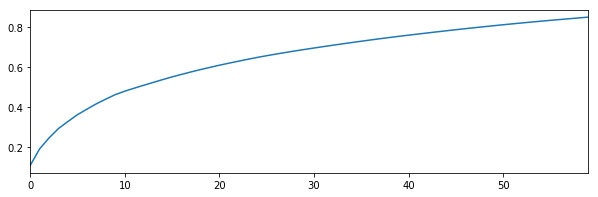

Variance preserved by first 60 components == 84.73%


In [19]:
'''
SVD
'''
ncomps = 60
svd = TruncatedSVD(n_components=ncomps)
svd_fit = svd.fit(X)
Y = svd.fit_transform(X)
ax = pd.Series(svd_fit.explained_variance_ratio_.cumsum()).plot(kind='line', figsize=(10,3))
plt.show()
print('Variance preserved by first 60 components == {:.2%}'.format(svd_fit.explained_variance_ratio_.cumsum()[-1]))
dfsvd = pd.DataFrame(Y, columns=['c{}'.format(c) for c in range(ncomps)], index=df.index)

In [20]:
'''
tSNE
'''

tsne = TSNE(n_components=2, random_state=0)
Z = tsne.fit_transform(dfsvd)
dftsne = pd.DataFrame(Z, columns=['x','y'], index=dfsvd.index)

In [21]:
'''
DBSCAN
(min_samples: 0)
'''
# DBSCAN with tSNE data
dbscan = DBSCAN()
labels = dbscan.fit_predict(Z)
print("Unique labels for DBSCAN with tSNE: {}".format(np.unique(labels)))
df['clusterLabel'] = labels

# DBSCAN with SVD data
labels_SVD = dbscan.fit_predict(Y)
print("Unique labels for DBSCAN with SVD: {}".format(np.unique(labels_SVD)))
df['clusterLabel.SVD'] = labels_SVD

# DBSCAN with raw data
labels_raw = dbscan.fit_predict(X)
print("Unique labels for DBSCAN with raw data: {}".format(np.unique(labels_raw)))
df['clusterLabel.raw'] = labels_raw

Unique labels for DBSCAN with tSNE: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Unique labels for DBSCAN with SVD: [-1]
Unique labels for DBSCAN with raw data: [-1]


In [22]:
'''
DBSCAN
(min_samples: 5)
'''
# DBSCAN with tSNE data
dbscan = DBSCAN(min_samples=5)
labels_5 = dbscan.fit_predict(Z)
print("Unique labels for DBSCAN with tSNE: {}".format(np.unique(labels)))
df['clusterLabel_5'] = labels_5

# DBSCAN with SVD data
labels_SVD = dbscan.fit_predict(Y)
print("Unique labels for DBSCAN with SVD: {}".format(np.unique(labels_SVD)))
df['clusterLabel.SVD'] = labels_SVD

# DBSCAN with raw data
labels_raw = dbscan.fit_predict(X)
print("Unique labels for DBSCAN with raw data: {}".format(np.unique(labels_raw)))
df['clusterLabel.raw'] = labels_raw

Unique labels for DBSCAN with tSNE: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Unique labels for DBSCAN with SVD: [-1]
Unique labels for DBSCAN with raw data: [-1]


In [23]:
'''
DBSCAN
(min_samples: 10)
'''
# DBSCAN with tSNE data
dbscan = DBSCAN(min_samples=10)
labels_10 = dbscan.fit_predict(Z)
print("Unique labels for DBSCAN with tSNE: {}".format(np.unique(labels)))
df['clusterLabel_10'] = labels_10
df.to_csv('/Users/lmc2/NIST/Notebooks/MachineLearningProject/SelectTrainingData/tSNE.DBSCAN/DEL/INS.tSNE_minSample_10.csv', index=False)

# DBSCAN with SVD data
labels_SVD = dbscan.fit_predict(Y)
print("Unique labels for DBSCAN with SVD: {}".format(np.unique(labels_SVD)))
df['clusterLabel.SVD'] = labels_SVD

# DBSCAN with raw data
labels_raw = dbscan.fit_predict(X)
print("Unique labels for DBSCAN with raw data: {}".format(np.unique(labels_raw)))
df['clusterLabel.raw'] = labels_raw

Unique labels for DBSCAN with tSNE: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Unique labels for DBSCAN with SVD: [-1]
Unique labels for DBSCAN with raw data: [-1]


In [24]:
'''
DBSCAN
(min_samples: 15)
'''
# DBSCAN with tSNE data
dbscan = DBSCAN(min_samples=15)
labels_15 = dbscan.fit_predict(Z)
print("Unique labels for DBSCAN with tSNE: {}".format(np.unique(labels)))
df['clusterLabel_15'] = labels_15

# DBSCAN with SVD data
labels_SVD = dbscan.fit_predict(Y)
print("Unique labels for DBSCAN with SVD: {}".format(np.unique(labels_SVD)))
df['clusterLabel.SVD'] = labels_SVD

# DBSCAN with raw data
labels_raw = dbscan.fit_predict(X)
print("Unique labels for DBSCAN with raw data: {}".format(np.unique(labels_raw)))
df['clusterLabel.raw'] = labels_raw

Unique labels for DBSCAN with tSNE: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Unique labels for DBSCAN with SVD: [-1]
Unique labels for DBSCAN with raw data: [-1]


In [43]:
'''
DBSCAN
(min_samples: 9)
'''
# DBSCAN with tSNE data
dbscan = DBSCAN(min_samples=8)
labels_9 = dbscan.fit_predict(Z)
print("Unique labels for DBSCAN with tSNE: {}".format(np.unique(labels)))
df['clusterLabel_9'] = labels_9
df.to_csv('/Users/lmc2/NIST/Notebooks/MachineLearningProject/SelectTrainingData/tSNE.DBSCAN/DEL/INS.tSNE_minSample_9.csv', index=False)


# DBSCAN with SVD data
labels_SVD = dbscan.fit_predict(Y)
print("Unique labels for DBSCAN with SVD: {}".format(np.unique(labels_SVD)))
df['clusterLabel.SVD'] = labels_SVD

# DBSCAN with raw data
labels_raw = dbscan.fit_predict(X)
print("Unique labels for DBSCAN with raw data: {}".format(np.unique(labels_raw)))
df['clusterLabel.raw'] = labels_raw

Unique labels for DBSCAN with tSNE: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Unique labels for DBSCAN with SVD: [-1]
Unique labels for DBSCAN with raw data: [-1]


In [13]:
# Error above: 
# Unique labels for SVD and raw data are not displaying
# Will import dataframe from previous run

In [29]:
df_dbscan = pd.DataFrame()

In [15]:
'''
Generate tSNE Plots
'''

'\nGenerate tSNE Plots\n'

In [31]:
'''
Data Cleaning
'''
dftsne['tandemrep_pct'] = df4['tandemrep_pct']
dftsne['segdup_pct'] = df4['segdup_pct']
dftsne['segdup_pct'].replace(0,-1,inplace=True)
dftsne['tandemrep_pct'].replace(0,-1,inplace=True)

bins = [-1, 0.2, 0.5, 1]
group_names = ['0-0.2', '0.2-0.5', '0.5-1']
df4['cat'] = pd.cut(df4['segdup_pct'], bins, labels=group_names)
df4['cat2'] = pd.cut(df4['tandemrep_pct'], bins, labels=group_names)

#Size Bins
bins = [20,50,100,1000,3000,9062]
df4['Size'] = df4['Size'].abs()
group_names_size = ['20-50', '50-100', '100-1000', '1000-3000', '3000-9062']
df4['size_bin'] = pd.cut(df4['Size'], bins, labels=group_names_size)
dftsne['cat'] = df4['cat']
dftsne['cat2'] = df4['cat2']
dftsne['size_bin'] = df4['size_bin']


df4['Size2'] = df4['Size'].apply(lambda x: x/1000)
dftsne['Size2'] = df4['Size2']
dftsne['Size'] = df4['Size']
dftsne['GTcons'] = df4['GTcons']
dftsne['sample'] = df4['sample']
dftsne['refN_pct'] = df4['refN_pct']
dftsne['label'] = df['clusterLabel']
dftsne['label_5'] = df['clusterLabel_5']
dftsne['label_10'] = df['clusterLabel_10']
dftsne['label_15'] = df['clusterLabel_15']
dftsne['label_9'] = df['clusterLabel_9']

df_dbscan['clusterLabel'] = df['clusterLabel']
df_dbscan['clusterLabel_5'] = df['clusterLabel_5']
df_dbscan['clusterLabel_10'] = df['clusterLabel_10']
df_dbscan['clusterLabel_15'] = df['clusterLabel_15']
df_dbscan['clusterLabel_9'] = df['clusterLabel_9']

# dftsne['label.SVD'] = df_dbscan['clusterLabel.SVD']
# dftsne['labelSVD'] = df_dbscan['clusterLabel.SVD']
# dftsne['label.raw'] = df_dbscan['clusterLabel.raw']

***
** Generate Plots **
***

In [32]:
output_notebook()

Loading BokehJS ...

** Size Distribution - Histogram **

In [33]:
output_notebook()
p = figure()
p = Histogram(log_size, values='log_size', title='HG002 DEL: Size Distribution', color='LightSlateGray', bins=30, xlabel="Size[log10]", ylabel="Frequency")
output_file("tSNE4_DEL_Histo_logsize.html")
show(p)

Loading BokehJS ...

ValueError: range parameter must be finite.

** Size Distribution - tSNE **

In [34]:
p = Scatter(dftsne, x='x', y='y', color='size_bin', title='HG002 DEL:Size', legend="top_left")
output_file("tSNE7_INS_SizeBin.html")
show(p)

** Consensus Genotype **

In [35]:
p = Scatter(dftsne, x='x', y='y', color='GTcons', title='HG002 DEL: Consensus Genotypes', legend="top_left")
output_file("tSNE6_INS_GTcons.html")
show(p)

INFO:bokeh.core.state:Session output file 'tSNE6_DEL_GTcons.html' already exists, will be overwritten.


** Tandem Repeat Plot **

In [36]:
p = Scatter(dftsne, x='x', y='y', color='cat2', title='HG002 DEL: tSNE tandem repeats', legend="top_left")
output_file("tSNE2_INS_tandRep.html")
show(p)

INFO:bokeh.core.state:Session output file 'tSNE2_DEL_tandRep.html' already exists, will be overwritten.


** Segmental Duplication Plot **

In [37]:
p = Scatter(dftsne, x='x', y='y', color='cat', title='HG002 DEL: tSNE segmental duplications', legend="top_left")
output_file("tSNE3_INS_segDup.html")
show(p)

INFO:bokeh.core.state:Session output file 'tSNE3_DEL_segDup.html' already exists, will be overwritten.


** DBSCAN with tSNE Data **

Summary: 

- The results (dataframes) from the following analyses: tSNE, SVD, orginal raw data were run in a DBSCAN model (repsectively) to generate cluster labels
- The suggested cluster labels are displayed on the original tSNE plot
- The following plots/analyses are results from DBSCAN analysis where [min_samples=0, 5, 15]
- The next notebook shows DBSCAN/tSNE plots where min_samples is altered
- **NOTE:** Datapoints assigned '-1' indicates that the DBSCAN model assigned the datapoint as 'noise' all other labels are significant cluster labels

In [38]:
import bokeh.palettes as palettes

x = dftsne['x']
y = dftsne['y']
samp = dftsne['label']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@label"),
        ]
    )
_tools_to_show = 'box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom' 
p = Scatter(dftsne, x='x', y='y', color='label', title='HG002 DEL: tSNE DBSCAN labels', legend="top_left", palette=palettes.Category20[20],tools=_tools_to_show)
output_file("tSNE2_DBSCAN_0_INS_label.html")
show(p)

INFO:bokeh.core.state:Session output file 'tSNE2_DBSCAN_0_DEL_label.html' already exists, will be overwritten.


In [39]:
import bokeh.palettes as palettes

x = dftsne['x']
y = dftsne['y']
samp = dftsne['label_5']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@label"),
        ]
    )
_tools_to_show = 'box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom' 
p = Scatter(dftsne, x='x', y='y', color='label_5', title='HG002 DEL: tSNE DBSCAN min_samp 5 labels', legend="top_left", palette=palettes.Category20[20],tools=_tools_to_show)
output_file("tSNE2_DBSCAN_5_INS_label.html")
show(p)

INFO:bokeh.core.state:Session output file 'tSNE2_DBSCAN_5_DEL_label.html' already exists, will be overwritten.


In [40]:
import bokeh.palettes as palettes

x = dftsne['x']
y = dftsne['y']
samp = dftsne['label']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@label"),
        ]
    )
_tools_to_show = 'box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom' 
p = Scatter(dftsne, x='x', y='y', color='label_9', title='HG002 DEL: tSNE DBSCAN min_samp 9 labels', legend="top_left", palette=palettes.Category20[20],tools=_tools_to_show)
output_file("tSNE2_DBSCAN_9_INS_label.html")
show(p)

INFO:bokeh.core.state:Session output file 'tSNE2_DBSCAN_9_DEL_label.html' already exists, will be overwritten.


In [41]:
import bokeh.palettes as palettes

x = dftsne['x']
y = dftsne['y']
samp = dftsne['label_10']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@label_10"),
        ]
    )
_tools_to_show = 'box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom' 
p = Scatter(dftsne, x='x', y='y', color='label_10', title='HG002 DEL: tSNE DBSCAN min_samp 10 labels', legend="top_left", palette=palettes.Category20[20],tools=_tools_to_show)
output_file("tSNE2_DBSCAN_10_INS_label.html")
show(p)

INFO:bokeh.core.state:Session output file 'tSNE2_DBSCAN_10_DEL_label.html' already exists, will be overwritten.


In [42]:
import bokeh.palettes as palettes

x = dftsne['x']
y = dftsne['y']
samp = dftsne['label']
source = ColumnDataSource(
        data=dict(
            x=x,
            y=y,
            samp=samp,
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("Group ID", "@label"),
        ]
    )
_tools_to_show = 'box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom' 
p = Scatter(dftsne, x='x', y='y', color='label_15', title='HG002 DEL: tSNE DBSCAN min_samp 15 labels', legend="top_left", palette=palettes.Category20[20],tools=_tools_to_show)
output_file("tSNE2_DBSCAN_15_INS_label.html")
show(p)

INFO:bokeh.core.state:Session output file 'tSNE2_DBSCAN_15_DEL_label.html' already exists, will be overwritten.


** min_samp: 0 **

In [96]:
lab = df_dbscan['clusterLabel']
# lab.SVD = df_dbscan['clusterLabel.SVD']
# lab.raw = df_dbscan['clusterLabel.raw']

 2     1660
 4      435
 15     276
 9      243
 0      241
 11     217
 8      193
 13     174
 12     151
 6      135
-1      133
 52     108
 14      98
 10      80
 29      60
 30      50
 17      40
 18      38
 16      37
 7       33
 26      33
 22      31
 3       30
 40      30
 34      29
 24      29
 28      28
 35      28
 20      27
 1       23
       ... 
 5       20
 42      19
 32      17
 44      15
 23      15
 21      15
 46      13
 50      13
 54      13
 55      11
 37      11
 25       9
 41       9
 27       8
 58       8
 49       7
 47       7
 33       7
 31       7
 36       7
 51       6
 39       6
 56       6
 38       6
 48       5
 45       5
 53       5
 57       5
 43       5
 59       5
Name: clusterLabel, dtype: int64


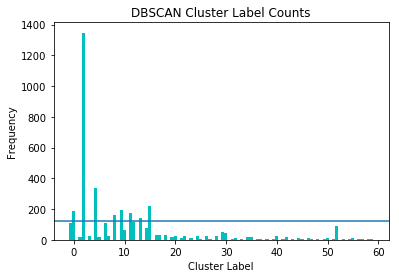

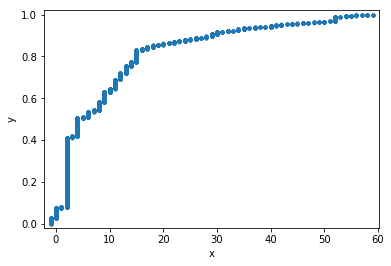

In [97]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
counting = df.groupby('clusterLabel').count()
countr = df['clusterLabel'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['clusterLabel'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['clusterLabel'])) / (len(df['clusterLabel']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** min_samp: 5 **

In [107]:
lab = df_dbscan['clusterLabel_5']

 2     1660
 4      435
 15     276
 9      243
 0      241
 11     217
 8      193
 13     174
 12     151
 6      135
-1      133
 52     108
 14      98
 10      80
 29      60
 30      50
 17      40
 18      38
 16      37
 7       33
 26      33
 22      31
 3       30
 40      30
 34      29
 24      29
 28      28
 35      28
 20      27
 1       23
       ... 
 5       20
 42      19
 32      17
 44      15
 23      15
 21      15
 46      13
 50      13
 54      13
 55      11
 37      11
 25       9
 41       9
 27       8
 58       8
 49       7
 47       7
 33       7
 31       7
 36       7
 51       6
 39       6
 56       6
 38       6
 48       5
 45       5
 53       5
 57       5
 43       5
 59       5
Name: clusterLabel_5, dtype: int64


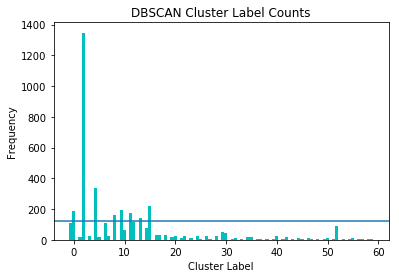

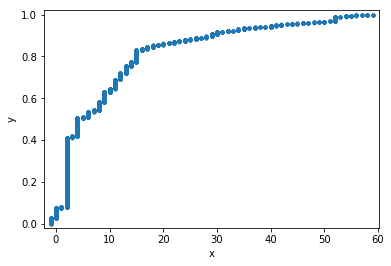

In [108]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
counting = df.groupby('clusterLabel_5').count()
countr = df['clusterLabel_5'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['clusterLabel_5'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['clusterLabel_5'])) / (len(df['clusterLabel_5']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** min_samp: 10 **

In [109]:
lab = df_dbscan['clusterLabel_10']

-1     491
 4     483
 13    427
 12    371
 10    243
 0     234
 8     231
 2     204
 11    188
 18    156
 14    146
 16    125
 6     111
 17    110
 50    108
 15     96
 23     91
 35     84
 9      80
 26     80
 20     68
 32     57
 36     50
 45     44
 34     44
 21     38
 31     38
 19     35
 42     34
 29     32
 25     31
 7      29
 40     29
 41     28
 28     28
 22     27
 3      27
 39     26
 1      23
 30     23
 33     20
 43     19
 5      19
 48     17
 37     16
 27     15
 44     15
 46     15
 24     15
 53     14
 38     14
 51     13
 49     12
 52     11
 47     10
Name: clusterLabel_10, dtype: int64


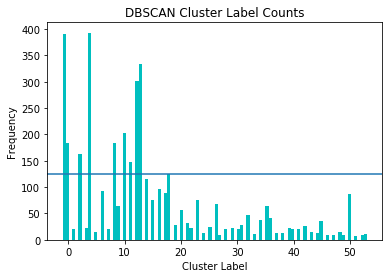

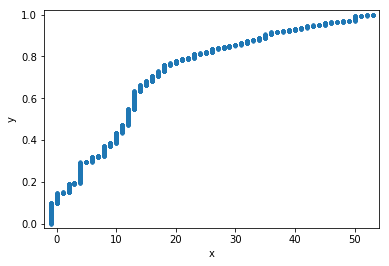

In [110]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
counting = df.groupby('clusterLabel_10').count()
countr = df['clusterLabel_10'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['clusterLabel_10'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['clusterLabel_10'])) / (len(df['clusterLabel_10']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** min_samp: 9 **

In [111]:
lab = df_dbscan['clusterLabel_9']

 2     1126
 9      491
 12     429
-1      344
 0      239
 8      239
 16     217
 11     214
 17     156
 13     151
 5      131
 44     108
 7      100
 15      96
 24      86
 10      80
 31      60
 33      50
 39      44
 30      39
 19      38
 18      37
 27      33
 6       31
 23      31
 35      29
 36      28
 26      28
 3       27
 21      27
 29      23
 1       23
 4       19
 38      19
 20      18
 14      18
 34      16
 25      15
 37      15
 22      15
 40      15
 45      13
 42      13
 41      11
 47      11
 43       9
 46       9
 28       8
 32       8
 48       8
Name: clusterLabel_9, dtype: int64


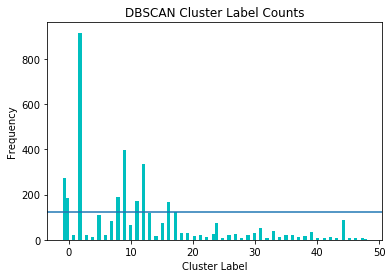

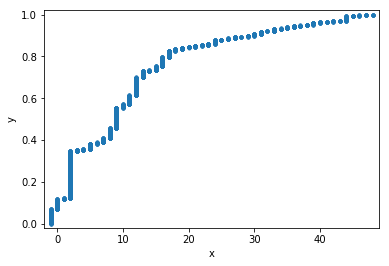

In [112]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
counting = df.groupby('clusterLabel_9').count()
countr = df['clusterLabel_9'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['clusterLabel_9'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['clusterLabel_9'])) / (len(df['clusterLabel_9']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

** min_samp: 15 **

In [111]:
lab = df_dbscan['clusterLabel_15']

-1     1109
 3      347
 23     304
 11     226
 5      201
 8      187
 17     173
 6      172
 25     139
 9      138
 12     129
 58     107
 10      96
 46      87
 4       80
 20      80
 15      69
 35      52
 40      50
 7       49
 31      48
 42      44
 22      43
 34      41
 29      40
 33      39
 18      38
 30      36
 41      36
 13      35
       ... 
 21      31
 50      30
 44      29
 38      28
 16      28
 62      28
 19      27
 26      26
 14      26
 57      26
 28      25
 45      23
 43      23
 32      23
 0       23
 47      22
 53      21
 54      21
 59      20
 52      20
 2       20
 51      19
 48      18
 39      18
 1       17
 37      17
 36      16
 60      15
 55      15
 61      13
Name: clusterLabel_15, dtype: int64


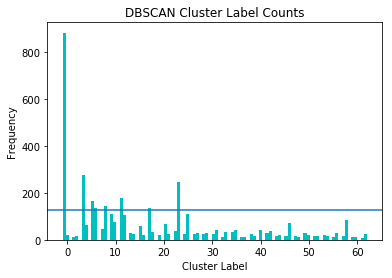

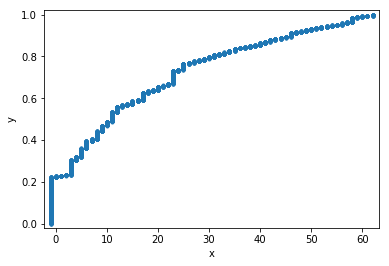

In [115]:
'''
DBSCAN tSNE
'''

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
counting = df.groupby('clusterLabel_15').count()
countr = df['clusterLabel_15'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("DBSCAN Cluster Label Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.axhline(y=125)
plt.show()


'''
3. Plot cumulative distribution function
'''

# sort the data:
data_sorted = np.sort(df['clusterLabel_15'])

# calculate the proportional values of samples
p = 1. * np.arange(len(df['clusterLabel_15'])) / (len(df['clusterLabel_15']) - 1)

# plot the sorted data:
_ = plt.plot(data_sorted, p, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.margins(0.02)
plt.show()

***
Random Seletion 
***

10 Random deletions were selected based on DBSCAN min_samp 9

In [44]:
rand_select = pd.read_csv('/Users/lmc2/NIST/Notebooks/MachineLearningProject/SelectTrainingData/tSNE.DBSCAN/INS/rand_10_9.csv')

** Size Distribution **

367    1
46     1
29     1
27     1
25     1
72     1
23     1
37     1
20     1
2      1
Name: Size, dtype: int64


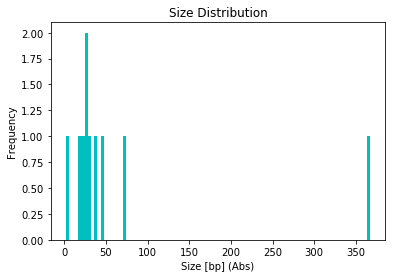

In [46]:
rand_select['Size'] = rand_select['Size'].abs()
lab = rand_select['Size']


'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
counting = rand_select.groupby('Size').count()
countr = rand_select['Size'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("Size Distribution")
plt.xlabel("Size [bp] (Abs)")
plt.ylabel("Frequency")
plt.show()

** DBSCAN Cluster Groups **

19    1
12    1
9     1
22    1
57    1
6     1
53    1
35    1
65    1
1     1
Name: clusterLabel_10, dtype: int64


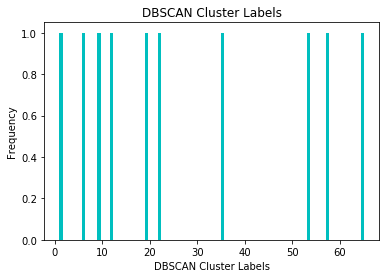

In [47]:
lab = rand_select['clusterLabel_10']

'''
1. List the counts of each label
2. Plot Frequency of each label in a histogram
'''
counting = rand_select.groupby('clusterLabel_10').count()
countr = rand_select['clusterLabel_10'].value_counts()
print (countr)
plt.hist(lab, bins=96, color='c')
plt.title("DBSCAN Cluster Labels")
plt.xlabel("DBSCAN Cluster Labels")
plt.ylabel("Frequency")
plt.show()